# Telescope Simulation

Simulation of parabolic lens focusing light of a plane wave

## Kitt Peak 2.1m Telescope
From http://www.noao.edu/outreach/kptour/2_1_m.html, this telescope has the following specs:

- Diameter = 2.4m = 2400mm
- Focal Ratio = f/2.63
- Focal Length = 2400*2.63 = 6312mm

In [15]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

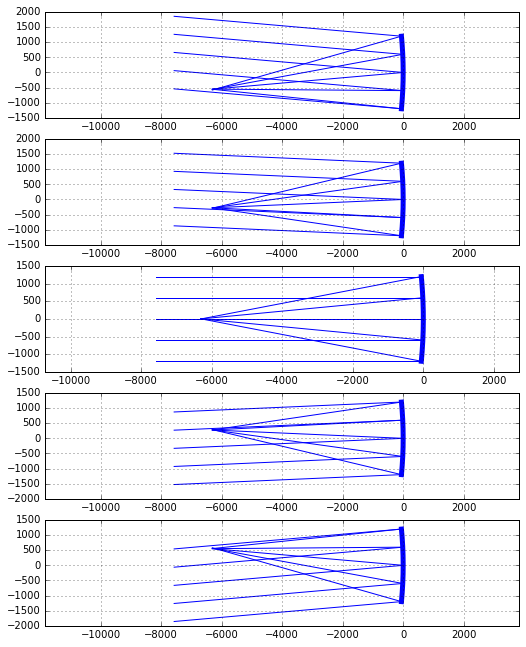

In [16]:
# Lens Parameters
diameter = 2400
focal_length = 6312

# Equation for reflector's shape
def parabola(x):
    return (x**2)/(4*focal_length)

# Number of rays to be plotted
num_rays = 5

# Incident angles to be plotted
angles = [-5, -2.5, 0, 2.5, 5]

# Setting up Figure
plt.figure(figsize=(8.5,11))

# Loop through all incident angles
for (i,angle) in enumerate(angles):
    # Create a new subplot
    plt.subplot(len(angles),1,i+1)
    
    # Incident ray angle
    angle_incident = np.deg2rad(angle) # In radians

    # Reflection Locations
    # Calculating reflection locations
    reflection_y = np.zeros(num_rays)
    for i in np.arange(num_rays):
        # Evenly space rays over the diameter of reflector
        reflection_y[i] = -diameter/2 + i*diameter/(num_rays-1)
    # Calculating mirror displacement at reflection location
    reflection_x = -parabola(reflection_y)

    # Start Locations
    # Setting X value where incident rays come from
    start_x = -focal_length*1.2
    # Calculating Y values where incident rays come from
    # Simple Y = mx+b calculation
    start_y = reflection_y+(start_x-reflection_x)*np.tan(angle_incident)

    # Calculating reflected angles of each ray using ray trace matrix eqn
    angle_reflected = angle_incident - (1/focal_length)*reflection_y

    # End locations
    # Calculating X values where reflected waves end
    end_x = -focal_length
    # Calculating Y values where incident rays come from
    # Simple Y = mx+b calculation
    end_y = reflection_y+(reflection_x-end_x)*np.tan(angle_reflected)

    # Draw Subplot
    
    # Plot parabolic lens
    y = np.arange(-diameter/2,diameter/2,diameter/1000)
    x = -parabola(y)
    plt.plot(x,y,linewidth=5.0)

    # Plot incident light rays
    for i in np.arange(num_rays):
        line = plt.Line2D((start_x,reflection_x[i]), (start_y[i],reflection_y[i]), lw=1)
        plt.gca().add_line(line)

    # Plot reflected light rays
    for i in np.arange(num_rays):
        line = plt.Line2D((end_x,reflection_x[i]), (end_y[i],reflection_y[i]), lw=1)
        plt.gca().add_line(line)

    plt.axis("equal")
    plt.grid("on")
